# Data Preprocessing of the Movie Dataset

In [2]:
import pandas as pd
import numpy as np

### Data input

In [3]:
df_ratings = pd.read_csv('ratings.csv', low_memory=False)

In [4]:
df_ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [6]:
df_movies = pd.read_csv('movies_metadata.csv', low_memory=False)

In [7]:
df_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


### Dataset Merging and Cleaning

In [16]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [23]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [29]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [8]:
df_movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [26]:
for i in df_movies.columns:
    null_rate = df_movies[i].isna().sum() / len(df_movies) * 100 
    print(f"{i}'s null rate : {null_rate}%")

adult's null rate : 0.0%
belongs_to_collection's null rate : 90.11569084590683%
budget's null rate : 0.0%
genres's null rate : 0.0%
homepage's null rate : 82.88391325386003%
id's null rate : 0.0%
imdb_id's null rate : 0.03739057757445124%
original_language's null rate : 0.024193903136409626%
original_title's null rate : 0.0%
overview's null rate : 2.0982712356486166%
popularity's null rate : 0.010997228698368012%
poster_path's null rate : 0.8489860555140104%
production_companies's null rate : 0.006598337219020807%
production_countries's null rate : 0.006598337219020807%
release_date's null rate : 0.19135177935160338%
revenue's null rate : 0.013196674438041614%
runtime's null rate : 0.5784542295341575%
spoken_languages's null rate : 0.013196674438041614%
status's null rate : 0.19135177935160338%
tagline's null rate : 55.10491356178243%
title's null rate : 0.013196674438041614%
video's null rate : 0.013196674438041614%
vote_average's null rate : 0.013196674438041614%
vote_count's null ra

In [39]:
df_credits.columns = ['id','cast','crew']

In [42]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Thus, the df_ratings dataset has no null values.

In [43]:
df_ratings['timestamp'].min()

789652004

In [44]:
df_ratings['timestamp'].max()

1501829870

In [9]:
rows = df_movies[df_movies['id'] == '1997-08-20']
rows

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# since we found that some values are in the format of 'xxxx-xx-xx' and all of them have NaN as vote
# Thus, we decided to delete those values
df_movies.loc[df_movies['id'].str.contains(r'\d{4}-\d{2}-\d{2}')] = np.nan

In [11]:
df_movies.dropna(subset=['id'], inplace=True)

In [12]:
df_movies['id'].astype('int64')

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45463, dtype: int64

In [13]:
df_movies['id'].dtype

dtype('O')

In [14]:
df_movies['id'] = pd.to_numeric(df_movies['id'], errors='coerce')

In [15]:
df_movies['id'].dtype

dtype('int64')

In [231]:
df_merged = pd.merge(df_movies, df_ratings, left_on='id', right_on='movieId')

In [232]:
df_merged.head(5)

,adult,genres,id,imdb_id,original_title,overview,popularity,production_countries,release_date,runtime,status,tagline,title,vote_average,vote_count,userId,movieId,rating,timestamp
0,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,1923,862,3.0,858335006
1,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,2103,862,5.0,946044912
2,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,5380,862,1.0,878941641
3,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,6177,862,4.0,859415226
4,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,6525,862,4.0,857388995


Thus in df_merged dataset, we merged the user's rating with the metadata for the movie.

In [233]:
df_merged['rating'].min()

0.5

In [234]:
df_merged['rating'].max()

5.0

In [235]:
df_merged['rating'].unique()

array([3. , 5. , 1. , 4. , 3.5, 4.5, 2. , 2.5, 1.5, 0.5])

We found that there is no value of 0 in our rating dataset. Thus the range for ratings should be 0.5 to 5.

Then, we decided to drop some columns that we are not focusing on for our merged dataset.

In [238]:
df_merged.head(2)

,adult,genres,id,imdb_id,original_title,overview,popularity,production_countries,release_date,runtime,status,tagline,title,vote_average,vote_count,userId,movieId,rating,timestamp
0,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,1923,862,3.0,858335006
1,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,2103,862,5.0,946044912


In [239]:
df_merged.isnull().sum()

adult                         0
genres                        0
id                            0
imdb_id                      47
original_title                0
overview                      0
popularity                    0
production_countries          0
release_date               7033
runtime                    1039
status                      866
tagline                 3496738
title                         0
vote_average                  0
vote_count                    0
userId                        0
movieId                       0
rating                        0
timestamp                     0
dtype: int64

In [78]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11437637 entries, 0 to 11437636
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   adult                 object 
 1   genres                object 
 2   id                    int64  
 3   imdb_id               object 
 4   original_title        object 
 5   overview              object 
 6   popularity            object 
 7   production_countries  object 
 8   release_date          object 
 9   runtime               float64
 10  status                object 
 11  tagline               object 
 12  title                 object 
 13  vote_average          float64
 14  vote_count            float64
 15  userId                int64  
 16  movieId               int64  
 17  rating                float64
 18  timestamp             int64  
dtypes: float64(4), int64(4), object(11)
memory usage: 1.7+ GB


In [82]:
df_merged.to_csv('cleaned_movie_data.csv')

However, we found that the merged dataset is too large with 7.3 GB. We decided to use the former dataset in our project, but in the future use, we can use the merged dataset.

# Before the merge

In [18]:
df_movies = df_movies.drop(['revenue','belongs_to_collection','budget','homepage','poster_path','original_language','production_companies','spoken_languages','video'], axis = 1)

In [19]:
df_movies.head(2)

,adult,genres,id,imdb_id,original_title,overview,popularity,production_countries,release_date,runtime,status,tagline,title,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


In [93]:
df_movies.to_csv('cleaned_movie_dataset.csv')

In [20]:
df_movies['adult'].value_counts()

False    45454
True         9
Name: adult, dtype: int64

In [24]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [25]:
df_movies['popularity'] = df_movies['popularity'].apply(clean_numeric).astype('float')
df_movies['vote_count'] = df_movies['vote_count'].apply(clean_numeric).astype('float')
df_movies['vote_average'] = df_movies['vote_average'].apply(clean_numeric).astype('float')

In [26]:
df_movies['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [27]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  object 
 1   genres                45463 non-null  object 
 2   id                    45463 non-null  int64  
 3   imdb_id               45446 non-null  object 
 4   original_title        45463 non-null  object 
 5   overview              44509 non-null  object 
 6   popularity            45460 non-null  float64
 7   production_countries  45460 non-null  object 
 8   release_date          45376 non-null  object 
 9   runtime               45203 non-null  float64
 10  status                45379 non-null  object 
 11  tagline               20412 non-null  object 
 12  title                 45460 non-null  object 
 13  vote_average          45460 non-null  float64
 14  vote_count            45460 non-null  float64
dtypes: float64(4), int6

# Data Visualization

### WordCloud on Title

In [28]:
df_movies['title'] = df_movies['title'].astype('str')
title_list = ' '.join(df_movies['title'])

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [61]:
color_func = lambda *args, **kwargs: "grey"
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_list)
top_words = list(title_wordcloud.words_.keys())[:5]


def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in top_words:
        return tuple(random.randint(0, 255) for _ in range(3))
    else:
        return "black"

# Recolor the most frequent word with red
title_wordcloud.recolor(color_func=lambda word, font_size, position, orientation, random_state=None: "red" if word in ["Love", "Man", "Girl", "Day"] else default_color, font_path)

plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Title', fontsize = 40)
plt.show()

SyntaxError: positional argument follows keyword argument (3774023098.py, line 13)

In [65]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_list)
top_words = list(title_wordcloud.words_.keys())[:5]


def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in top_words:
        return "red"
    else:
        return "grey"

# Recolor the most frequent word with red
title_wordcloud.recolor(color_func=color_func)

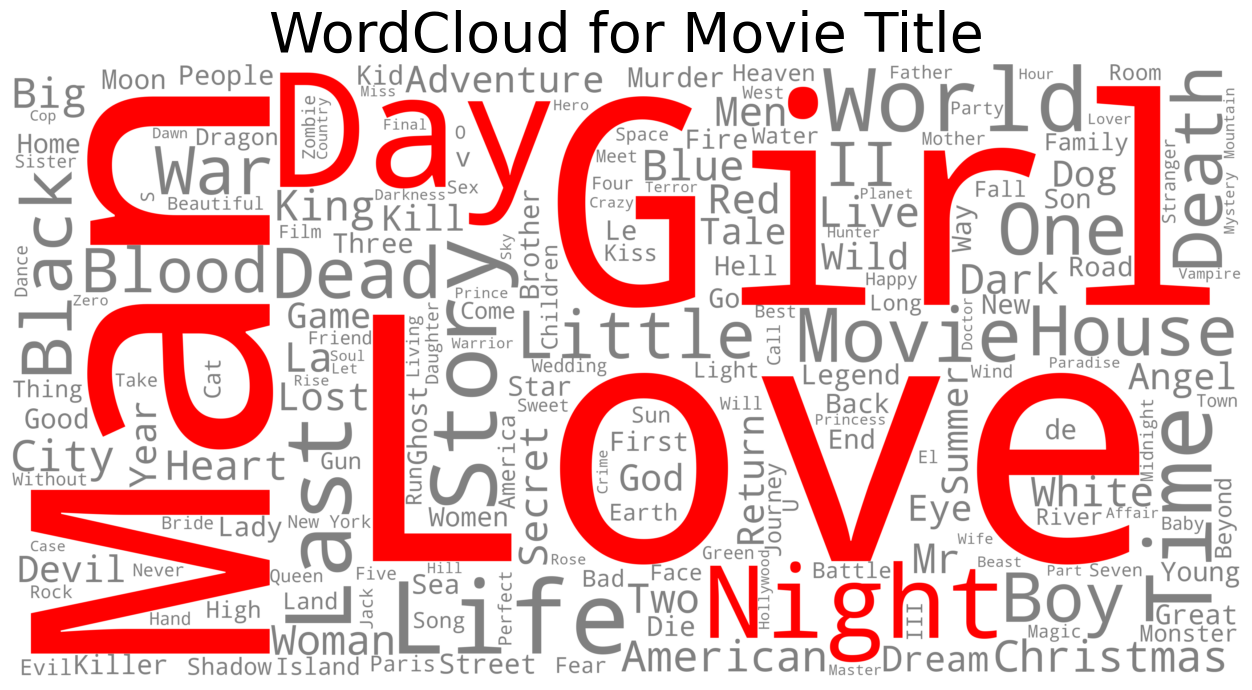

In [77]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Movie Title', fontsize = 40)
plt.show()

### Analysis on Genre

In [49]:
df_movies['genres'].describe()

count                             45463
unique                             4066
top       [{'id': 18, 'name': 'Drama'}]
freq                               5000
Name: genres, dtype: object

In [79]:
import ast

In [80]:
df_movies['genres'] = df_movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [82]:
genre_list = df_movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre_list.name = 'genre'
df_genre = df_movies.drop('genres', axis=1).join(genre_list)
df_genre['genre'].value_counts().shape[0]

/var/folders/0y/mlx37qrn7gvcmwppy4gc7lbm0000gn/T/ipykernel_51385/1719266329.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genre_list = df_movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


20

In [83]:
df_genre.head(2)

,adult,id,imdb_id,original_title,overview,popularity,production_countries,release_date,runtime,status,tagline,title,vote_average,vote_count,genre
0,False,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,Animation
0,False,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Released,NaN,Toy Story,7.7,5415.0,Comedy


In [84]:
# Get the TOP 10 genres among all movies
top_genre = pd.DataFrame(df_genre['genre'].value_counts()).reset_index()
top_genre.columns = ['genre', 'movies']
top_genre.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


In [85]:
df_movies['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [86]:
df_movies['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [89]:
df_ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [90]:
movie_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

In [91]:
movie_ratings.columns = ['rating_count', 'avg_rating']

In [92]:
movie_ratings = movie_ratings.reset_index()
movie_ratings

,movieId,rating_count,avg_rating
0,1,66008,3.888157
1,2,26060,3.236953
2,3,15497,3.175550
3,4,2981,2.875713
4,5,15258,3.079565
...,...,...,...
45110,176267,1,4.000000
45111,176269,1,3.500000
45112,176271,1,5.000000
45113,176273,1,1.000000


In [95]:
new_df =  pd.merge(movie_ratings, df_genre, left_on='movieId', right_on = "id")

In [96]:
new_df.head(2)

,movieId,rating_count,avg_rating,adult,id,imdb_id,original_title,overview,popularity,production_countries,release_date,runtime,status,tagline,title,vote_average,vote_count,genre
0,2,26060,3.236953,False,2,tt0094675,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,69.0,Released,NaN,Ariel,7.1,44.0,Drama
1,2,26060,3.236953,False,2,tt0094675,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,69.0,Released,NaN,Ariel,7.1,44.0,Crime


In [111]:
new_df.to_csv('dataset_newrating&genre.csv')

In [126]:
genre_rating = new_df.groupby('genre')['rating_count', 'avg_rating'].agg(['mean', 'sum']).reset_index()

/var/folders/0y/mlx37qrn7gvcmwppy4gc7lbm0000gn/T/ipykernel_51385/1927251536.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_rating = new_df.groupby('genre')['rating_count', 'avg_rating'].agg(['mean', 'sum']).reset_index()


In [144]:
genre_rating.columns = ['genre','rating_count_average', 'rating_count_sum','avg_rating_average', 'avg_rating_sum']

In [145]:
genre_rating 

,genre,rating_count_average,rating_count_sum,avg_rating_average,avg_rating_sum
0,Action,1931.387234,2269380,3.158533,3711.276192
1,Adventure,2264.599717,1601072,3.168709,2240.277307
2,Animation,1092.461883,243619,3.175885,708.222457
3,Comedy,1537.018457,3247720,3.137049,6628.585525
4,Crime,2170.835722,1968948,3.162584,2868.463632
5,Documentary,615.638171,309666,3.074236,1546.340511
6,Drama,1770.182062,6592158,3.139122,11690.088929
7,Family,1505.883420,581271,3.156905,1218.565520
8,Fantasy,1859.332613,860871,3.142914,1455.168961
9,Foreign,559.859779,151722,3.113986,843.890161


In [172]:
df_sorted_ratingcount = genre_rating.sort_values('rating_count_sum', ascending=False)

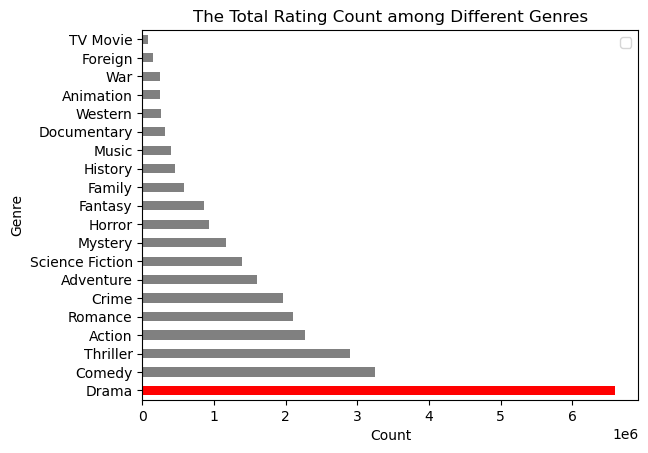

In [173]:
colors = ['red' if x == df_sorted_ratingcount['rating_count_sum'].max() else 'grey' for x in df_sorted_ratingcount['rating_count_sum']]

ax = df_sorted_ratingcount.plot.barh(x='genre', y='rating_count_sum', color=colors)


ax.set_title("The Total Rating Count among Different Genres")
ax.set_xlabel("Count")
ax.set_ylabel("Genre")
ax.legend('')


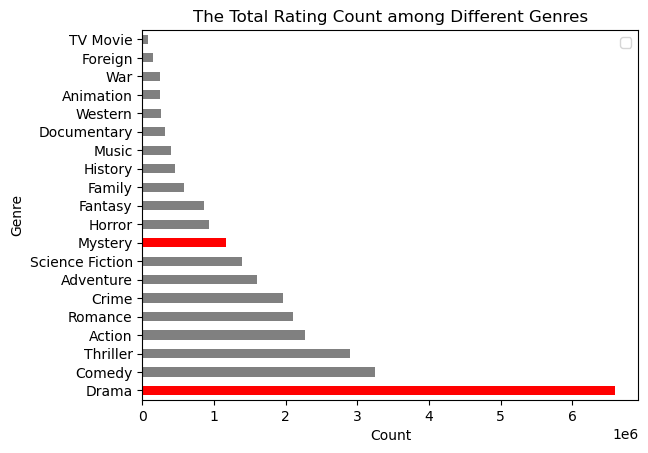

In [174]:
max_rating_count = df_sorted_ratingcount['rating_count_sum'].max()

colors = ['red' if x == max_rating_count or genre == 'Mystery' else 'grey' for genre, x in zip(df_sorted_ratingcount['genre'], df_sorted_ratingcount['rating_count_sum'])]
ax = df_sorted_ratingcount.plot.barh(x='genre', y='rating_count_sum', color=colors)


ax.set_title("The Total Rating Count among Different Genres")
ax.set_xlabel("Count")
ax.set_ylabel("Genre")
ax.legend('')

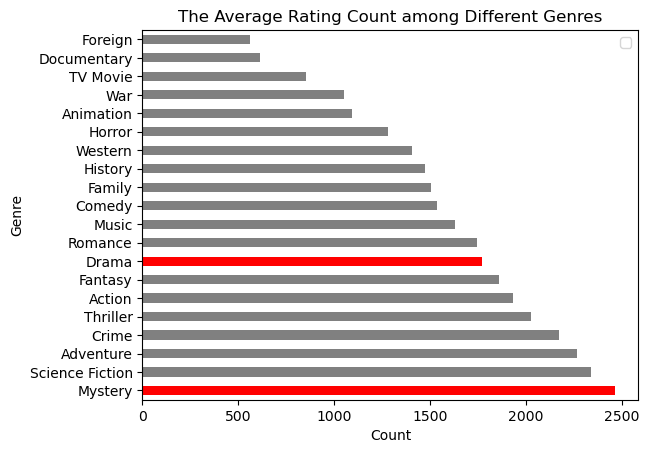

In [175]:
df_sorted_ratingcount = genre_rating.sort_values('rating_count_average', ascending=False)

max_rating_average = df_sorted_ratingcount['rating_count_average'].max()

colors = ['red' if x == max_rating_average or genre == 'Drama' else 'grey' for genre, x in zip(df_sorted_ratingcount['genre'], df_sorted_ratingcount['rating_count_average'])]

ax = df_sorted_ratingcount.plot.barh(x='genre', y='rating_count_average', color=colors)


ax.set_title("The Average Rating Count among Different Genres")
ax.set_xlabel("Count")
ax.set_ylabel("Genre")
ax.legend('')


In [223]:
new_small_df=new_df[['id', 'genre']]
new_merged_df = pd.merge(new_small_df,movie_ratings, left_on = 'id', right_on = 'movieId')
new_merged_df.head(5)

,id,genre,movieId,rating_count,avg_rating
0,2,Drama,2,26060,3.236953
1,2,Crime,2,26060,3.236953
2,3,Drama,3,15497,3.175550
3,3,Comedy,3,15497,3.175550
4,5,Crime,5,15258,3.079565


In [224]:
new_merged_df.drop(['movieId'], axis = 1)

,id,genre,rating_count,avg_rating
0,2,Drama,26060,3.236953
1,2,Crime,26060,3.236953
2,3,Drama,15497,3.175550
3,3,Comedy,15497,3.175550
4,5,Crime,15258,3.079565
...,...,...,...,...
16319,176143,War,1,3.500000
16320,176143,Drama,1,3.500000
16321,176167,Drama,1,3.000000
16322,176167,Music,1,3.000000


In [225]:
new_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 0 to 16323
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            16324 non-null  int64  
 1   genre         15953 non-null  object 
 2   movieId       16324 non-null  int64  
 3   rating_count  16324 non-null  int64  
 4   avg_rating    16324 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 765.2+ KB


In [227]:
new_merged_df.dropna(subset=['genre'], inplace=True)
new_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15953 entries, 0 to 16322
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            15953 non-null  int64  
 1   genre         15953 non-null  object 
 2   movieId       15953 non-null  int64  
 3   rating_count  15953 non-null  int64  
 4   avg_rating    15953 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 747.8+ KB


In [252]:
df_merged['id'].nunique()

7565

In [256]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11437637 entries, 0 to 11437636
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   adult                 object 
 1   genres                object 
 2   id                    int64  
 3   imdb_id               object 
 4   original_title        object 
 5   overview              object 
 6   popularity            float64
 7   production_countries  object 
 8   release_date          object 
 9   runtime               float64
 10  status                object 
 11  tagline               object 
 12  title                 object 
 13  vote_average          float64
 14  vote_count            float64
 15  userId                int64  
 16  movieId               int64  
 17  rating                float64
 18  timestamp             int64  
dtypes: float64(5), int64(4), object(10)
memory usage: 2.0+ GB


In [257]:
new_merged_df

,id,genre,movieId,rating_count,avg_rating
0,2,Drama,2,26060,3.236953
1,2,Crime,2,26060,3.236953
2,3,Drama,3,15497,3.175550
3,3,Comedy,3,15497,3.175550
4,5,Crime,5,15258,3.079565
...,...,...,...,...,...
16318,176085,Comedy,176085,2,3.000000
16319,176143,War,176143,1,3.500000
16320,176143,Drama,176143,1,3.500000
16321,176167,Drama,176167,1,3.000000


In [261]:
new_merged_df['rating_total']=new_merged_df['rating_count']*new_merged_df['avg_rating']
new_merged_df.head(5)

,id,genre,movieId,rating_count,avg_rating,rating_total
0,2,Drama,2,26060,3.236953,84355.0
1,2,Crime,2,26060,3.236953,84355.0
2,3,Drama,3,15497,3.175550,49211.5
3,3,Comedy,3,15497,3.175550,49211.5
4,5,Crime,5,15258,3.079565,46988.0


<Figure size 1800x800 with 0 Axes>

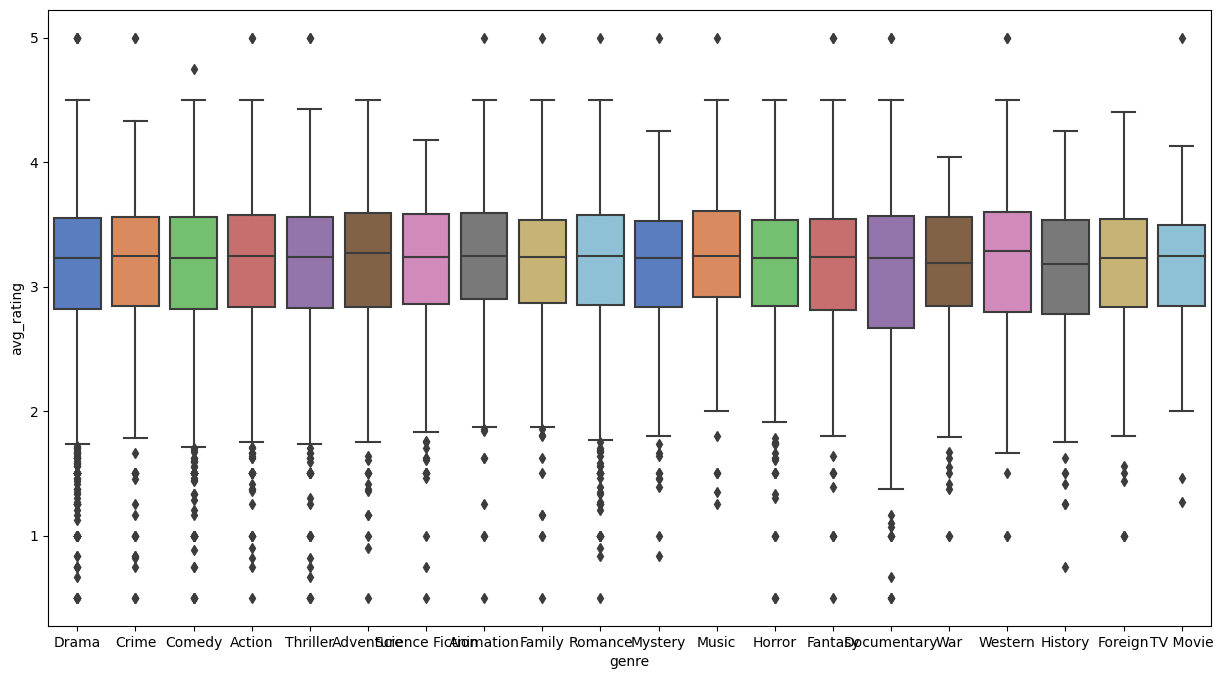

In [266]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='avg_rating', data=new_merged_df, palette="muted", ax =ax)
plt.show()

In [271]:
df_genre_small = df_genre[['id', 'genre']]
df_genre_small.head(2)

,id,genre
0,862,Animation
0,862,Comedy


In [273]:
df_merged_ss = pd.merge(df_genre_small,df_ratings, left_on = 'id', right_on = 'movieId')
df_merged_ss.head(3)

,id,genre,userId,movieId,rating,timestamp
0,862,Animation,1923,862,3.0,858335006
1,862,Animation,2103,862,5.0,946044912
2,862,Animation,5380,862,1.0,878941641


In [274]:
df_merged_ss.drop(['timestamp', 'movieId'],axis = 1)

,id,genre,userId,rating
0,862,Animation,1923,3.0
1,862,Animation,2103,5.0
2,862,Animation,5380,1.0
3,862,Animation,6177,4.0
4,862,Animation,6525,4.0
...,...,...,...,...
27796889,111109,Drama,33940,2.5
27796890,111109,Drama,172224,3.0
27796891,111109,Drama,210792,3.0
27796892,111109,Drama,225396,3.5


<Figure size 1800x800 with 0 Axes>

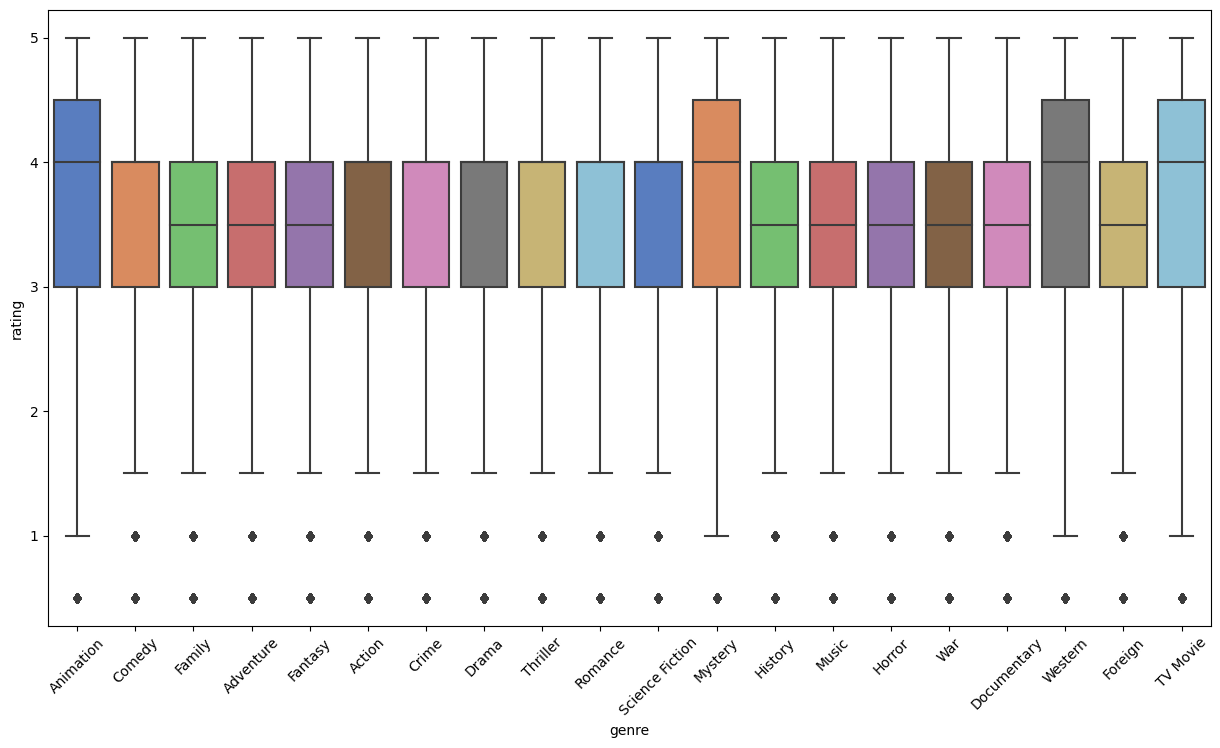

In [276]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='rating', data=df_merged_ss, palette="muted", ax =ax)
plt.xticks(rotation=45)
plt.show()

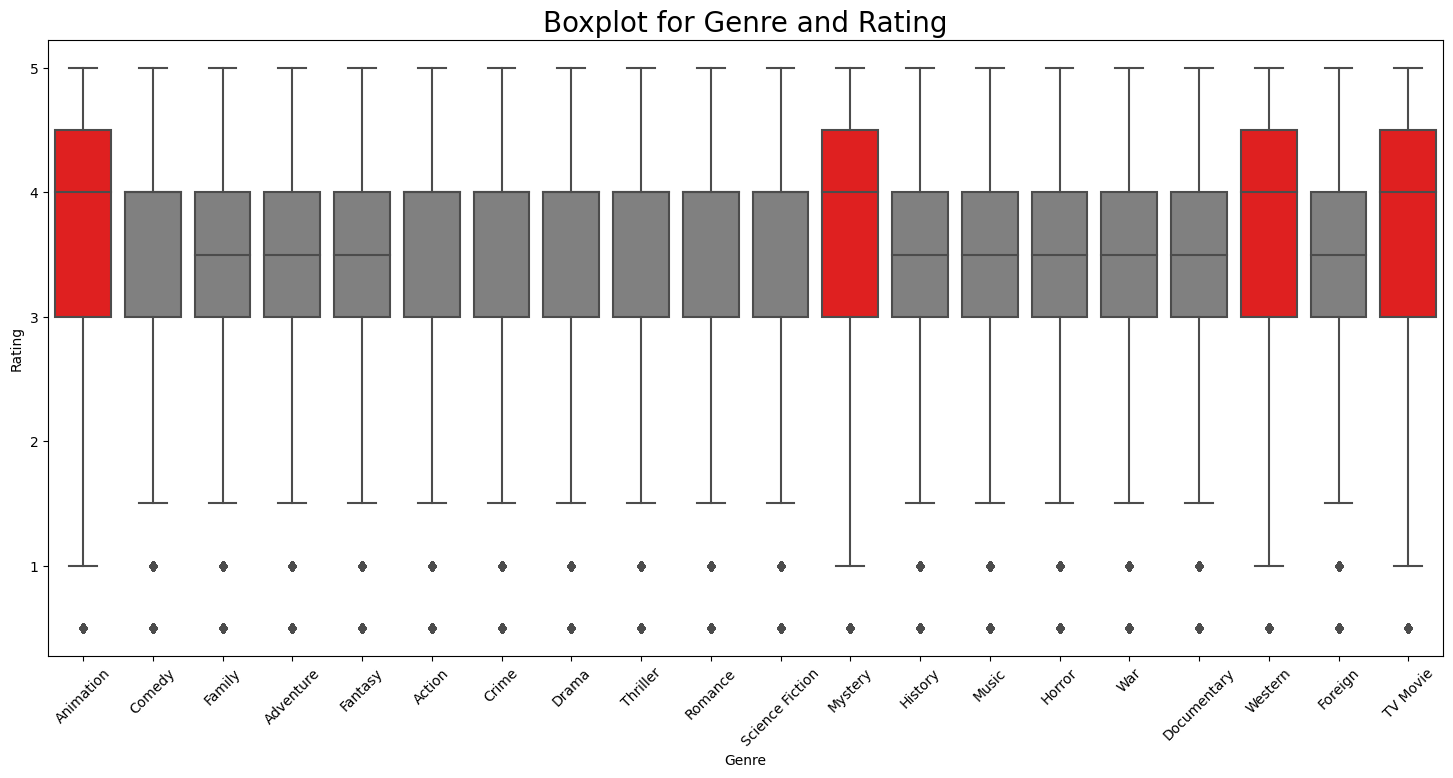

In [281]:
highlight_genres = ['Animation', 'Mystery', 'Western', 'TV Movie']

# Define color palette
boxplot_colors = ['grey' if genre not in highlight_genres else 'red' for genre in df_merged_ss['genre'].unique()]
color_dict = dict(zip(df_merged_ss['genre'].unique(), boxplot_colors))

# Create boxplot
plt.figure(figsize=(18,8))
sns.boxplot(x='genre', y='rating', data=df_merged_ss, palette=color_dict)
plt.xticks(rotation=45)
plt.title("Boxplot for Genre and Rating", fontsize = 20)
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()